# This file is to demonstrate the hidden networks with 15*N=28 and then get the verified results
Huifang for Amanda on July 21, 2016


In [1]:
import scipy.io
import os.path
import sys


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/AmandaE/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import matplotlib.gridspec as gridspec

In [4]:
def mln_read_mlnMat(filename):
    matdata = scipy.io.loadmat(filename)
    mlnMat=matdata['mlnMat']
    para=matdata['para'][0][0]
    
    return mlnMat, para

In [5]:
def mln_fmlnMat(nc, filename):
    mlnMat,para=mln_read_mlnMat(filename)
    methodlog=para['methodlog']
    theta=para['theta']


    #fmlnMat=np.zeros([nc,nc])    
    thetamlnMat=mlnMat
    for iboot in np.arange(20):
        imlnMat=mlnMat[:,:,iboot]
        ithethod=para['theta'][iboot]
        imlnMat[imlnMat<ithethod[0]]=0
        imlnMat[imlnMat>=ithethod[1]]=2
        imlnMat[(imlnMat>=ithethod[0])*(imlnMat<ithethod[1])]=1
        thetamlnMat[:,:,iboot]=imlnMat
    imdMat=np.median(thetamlnMat,axis=2)
    imdMat[imdMat<0.6]=0.
    return imdMat

In [6]:
from mne.viz import circular_layout

In [7]:
import itertools

In [135]:
basicrawdir='/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/' # folder names

datasets='29181'# datasets name in /data folder


basicdir=basicrawdir+'hidden/'
iwins=50

Toutdir=basicdir+'Win'+str(iwins)+'/ToutResults/'
bm='PCohF'

N28fMat=[]
nchan=96
listlinkall=[]
for inbgv,bgv in enumerate(itertools.combinations(np.arange(6)+1,2)):
    addname='b'+str(bgv[0])+str(bgv[1])
    Toutdir=basicdir+'Win'+str(iwins)+'/ToutResults/'
    prename=datasets+addname
    
    toutfile='Tout_'+str(iwins)+'_'+prename+'.mat'
    id_datasets=datasets+addname
    filename=Toutdir+toutfile
    
    matdata = scipy.io.loadmat(filename)
    bmMat=matdata[bm]
    ifMat=np.mean(bmMat,axis=2)

    #ib_labelname=[labelname[indch] for indch in ilistCa]
    dfilename=basicdir+'/data/'+id_datasets
    print(dfilename)
    iliststr = mln_read_listlink(dfilename)
    ifMatO=np.zeros([nchan,nchan])
    for iind, inode in enumerate(iliststr):
        for jind,jnode in enumerate(iliststr):
             ifMatO[inode-1,jnode-1]=ifMat[iind,jind]
             listlinkall.append((iliststr[iind][0][0],iliststr[jind][0][0]))
    N28fMat.append(ifMatO)



/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b12
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b13
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b14
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b15
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b16
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b23
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b24
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b25
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden//data/29181b26
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hi

In [10]:
def mln_read_listlink(dfilename):
    
    timedata = scipy.io.loadmat(dfilename)
    Params=timedata['Params']
    #para=matdata['para'][0][0]
    iliststr=Params['str'][:][0][0][0]
    #ilistlink=[(iliststr[inode][0][0],iliststr[jnode][0][0]) for inode in np.arange(nc) for jnode in np.arange(nc)]
    return iliststr

In [136]:
fNchanMat=np.zeros([nchan,nchan]) # this is the connectivity matrix for subnetworks 
nmat_temp = np.zeros([nchan,nchan])
for inode in np.arange(nchan):
    for jnode in np.arange(nchan):
        Nlink=listlinkall.count((inode+1,jnode+1))
        nmat_temp[inode,jnode] = Nlink
        ijfMatSum=[N28fMat[isub][inode][jnode] for isub in np.arange(15)]
        fNchanMat[inode,jnode]=np.sum(ijfMatSum)/Nlink    


In [39]:
hidata = scipy.io.loadmat(basicrawdir+'/'+'/data/'+datasets+'.mat')
N84gtMat=hidata['Connectivity']

In [40]:
scipy.io.savemat(Toutdir+'Int_'+datasets+'.mat',{'fNchanMat':fNchanMat,'N28fMat':N28fMat,'gtMat':N84gtMat})

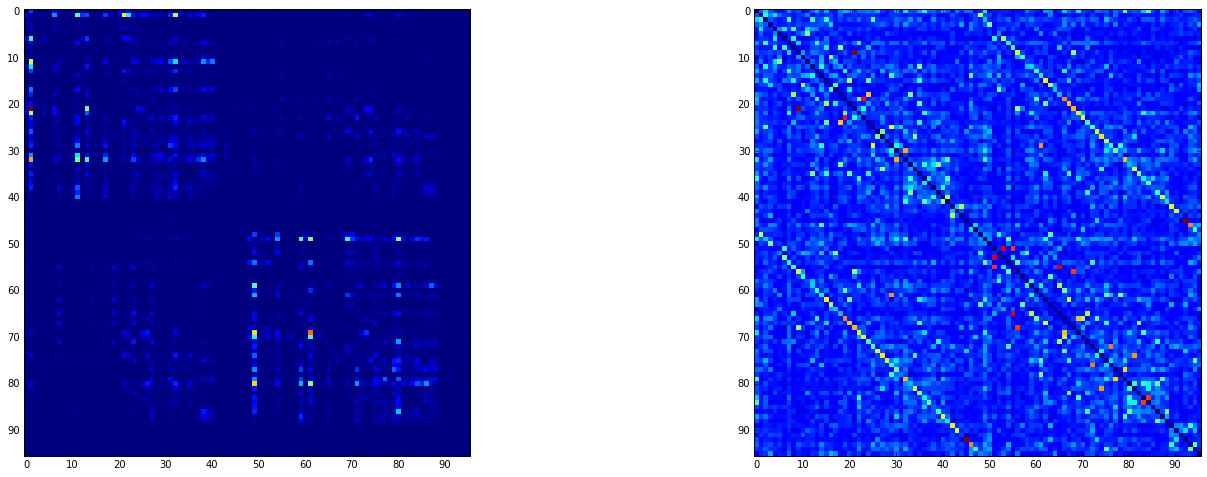

In [139]:
figure(figsize=(24,8))
xindex=np.arange(0,nchan,10)
# labelxN84=[labelnameN84[ix] for ix in xindex]

ax1=subplot(121)
plt.imshow(N84gtMat,interpolation='nearest')
ax1.set_xticks(xindex)
#ax1.set_xticklabels(labelxN84,size=16)
ax1.set_yticks(xindex)
#ax1.set_yticklabels(labelxN84,size=16)

ax2=subplot(122)
# plt.imshow(fNchanMat,interpolation='nearest')
plt.imshow(fcmat2,interpolation='nearest')
ax2.set_xticks(xindex)
#ax2.set_xticklabels(labelxN84,size=16)
ax2.set_yticks(xindex)
#ax2.set_yticklabels(labelxN84,size=16)